# Descripcion del problema

El objetivo del problema es predecir la etiqueta `total_cases` para cada (ciudad, año, semana_del_año) en el conjunto de pruebas. Hay dos ciudades, San Juan e Iquitos, con datos de prueba para cada ciudad que abarcan 5 y 3 años respectivamente.


El conjunto de pruebas es una retención futura pura, lo que significa que los datos de prueba son secuenciales y no se superponen con ninguno de los datos de entrenamiento. En todo momento, los valores faltantes se han llenado como NaNs.

# Cargamos todos los datos desde github

In [1]:
import pandas as pd

train_X = pd.read_csv('https://raw.githubusercontent.com/IgnacioBarb/Actividades-SNS/main/Act%203.8/CSV/dengue_features_train.csv')
train_Y = pd.read_csv('https://raw.githubusercontent.com/IgnacioBarb/Actividades-SNS/main/Act%203.8/CSV/dengue_labels_train.csv')
test_X = pd.read_csv('https://raw.githubusercontent.com/IgnacioBarb/Actividades-SNS/main/Act%203.8/CSV/dengue_features_test.csv')

# Visualizacion de datos

## train_X

C:\Users\madre\AppData\Local\Temp\ipykernel_1444\1787481497.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_X.corr(), annot=True, fmt=".2f", ax=ax)


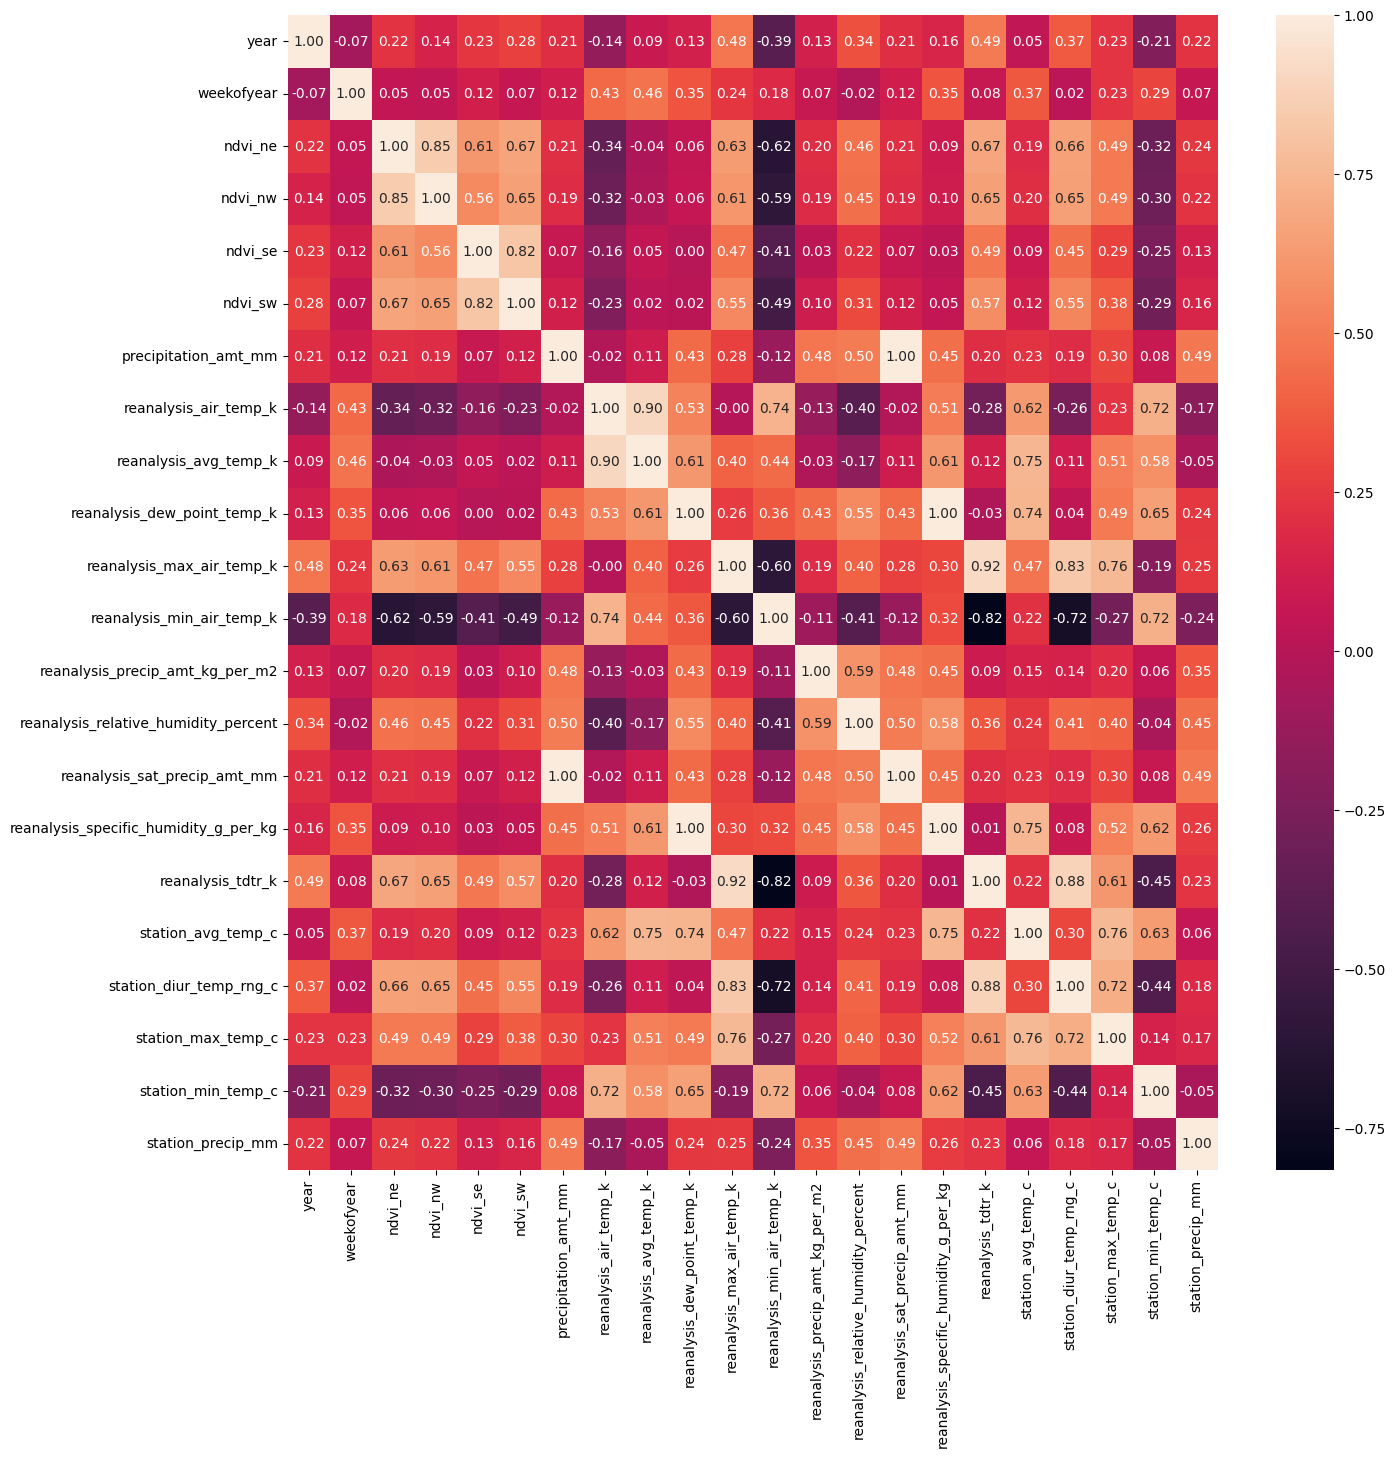

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train_X.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

## test_X

C:\Users\madre\AppData\Local\Temp\ipykernel_1444\3073858930.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_X.corr(), annot=True, fmt=".2f", ax=ax)


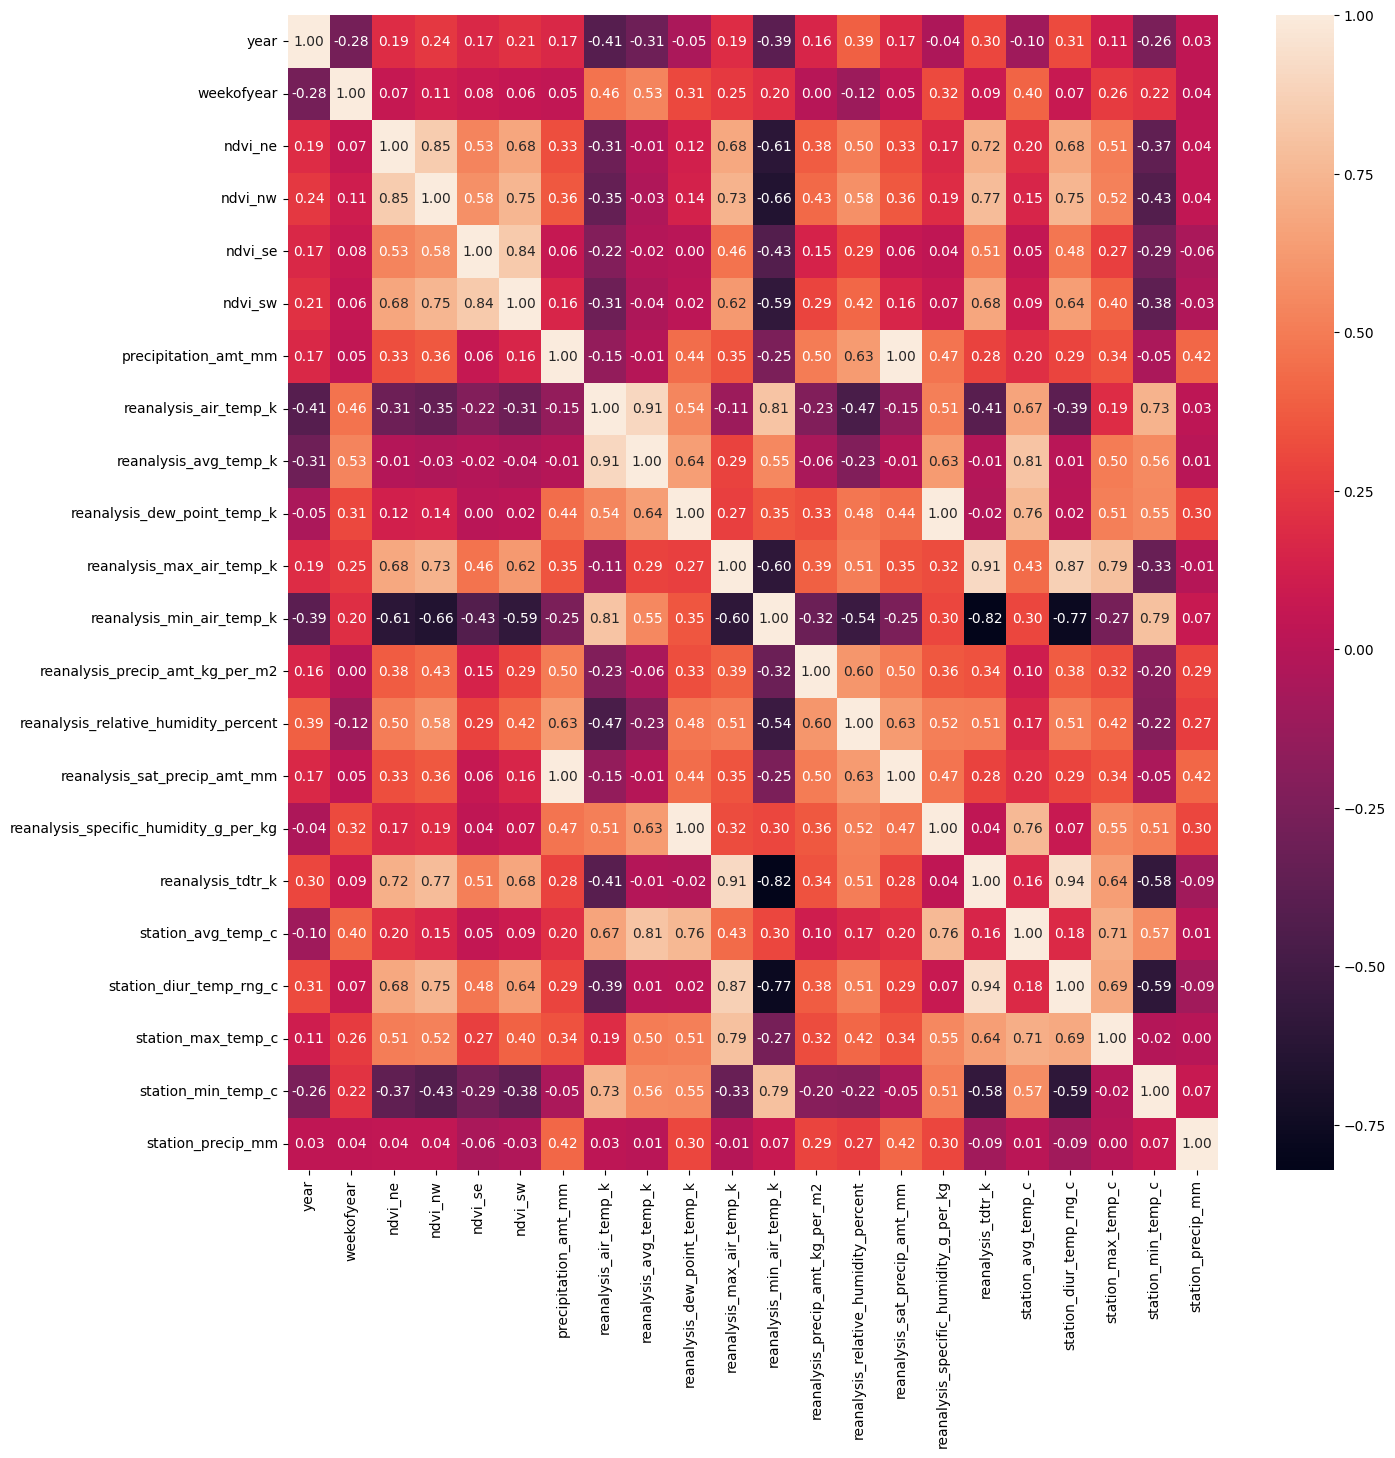

In [3]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(test_X.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

# Manipulacion de datos

In [4]:
train_X.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [5]:
train_Y.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [6]:
test_X.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

### x_train

In [7]:
#Transformamo lo datos de city a numerico
train_X['city'] = train_X['city'].replace(['sj', 'iq'], [0,1]) 
#Eliminamos todos los datos de week_start_date 
train_X.drop(['week_start_date'], axis=1, inplace=True)
#Eliminamos todos los datos con mucha correlacion
train_X.drop(['reanalysis_sat_precip_amt_mm'], axis=1, inplace=True)
#Rellenamos los datos na
train_X.fillna(0, inplace=True)

### y_train

In [8]:
#Transformamo lo datos de city a numerico
train_Y['city'] = train_Y['city'].replace(['sj', 'iq'], [0,1])
#Rellenamos los datos na
train_Y.fillna(0, inplace=True)

### x_test

In [9]:
#Transformamo lo datos de city a numerico
test_X['city'] = test_X['city'].replace(['sj', 'iq'], [0,1])
#Eliminamos todos los datos de week_start_date
test_X.drop(['week_start_date'], axis=1, inplace=True)
#Eliminamos todos los datos con mucha correlacion
test_X.drop(['reanalysis_sat_precip_amt_mm'], axis=1, inplace=True)
#Rellenamos los datos na
test_X.fillna(0, inplace=True)

### Escalado de datos

In [10]:
from sklearn.preprocessing import MaxAbsScaler

#Escalamos los datos
scaler = MaxAbsScaler()
train_X[train_X.columns] = scaler.fit_transform(train_X)
test_X[test_X.columns] = scaler.fit_transform(test_X)

# Modelo

## Optener los mejores hyperparametros para el modelo

In [11]:
#Dividemos los datasets de train
from sklearn.model_selection import train_test_split
train_Y = train_Y['total_cases']

trainX, testX, trainY, testY  = train_test_split(train_X, train_Y, test_size = 0.2)

In [12]:
#Con los datasets dividimos calculamos los mejores hyperparametros para el modelo
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt

res = {}
weights = ['uniform', 'distance']
uniform = []
distance = []
for K in range(1,60):
    for W in weights:
        knn = KNeighborsRegressor(K, weights=W)
        knn.fit(trainX, trainY)
        predY = knn.predict(testX)
        scores = mae(testY, predY)
        res[str(scores)] = [K, W]
        #Obtenemos los resultados
        if W == 'uniform':
            uniform.append(scores)

        if W == 'distance':
            distance.append(scores)


print(f'Mejor resultado: \nMAE => {min(res)} \nValores => {res[min(res)]}')

Mejor resultado: 
MAE => 21.100767862725043 
Valores => [12, 'distance']


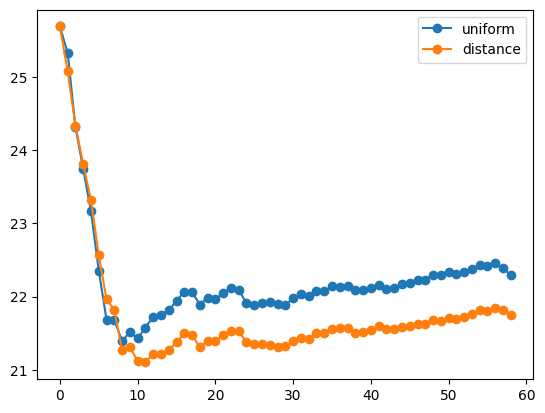

In [13]:
#Mostramos los resultados obtenidos anterir mmente
plt.plot(uniform, label='uniform', marker="o")
plt.plot(distance, label='distance', marker="o")
plt.legend()
plt.show()

## Entrenamiento final

In [14]:

#Entrenamos el modelo con los mejores hyper parametros
knn = KNeighborsRegressor(res[min(res)][0], weights=res[min(res)][1])
knn.fit(train_X, train_Y)

KNeighborsRegressor(n_neighbors=12, weights='distance')

# Exportacion del la prediccion

In [15]:
#Obtenemos la prediccion
pred_y = knn.predict(test_X)

#Transformamos los datos a enteros
pred_y = pred_y.astype(int) 

#leemos el submission_format
predicion = pd.read_csv('https://raw.githubusercontent.com/IgnacioBarb/Actividades-SNS/main/Act%203.8/CSV/submission_format.csv')

#rellenamos los datos de 'total_case' con la prediccion
predicion['total_cases'] = pred_y

predicion

,city,year,weekofyear,total_cases
0,sj,2008,18,4
1,sj,2008,19,9
2,sj,2008,20,9
3,sj,2008,21,10
4,sj,2008,22,24
...,...,...,...,...
411,iq,2013,22,3
412,iq,2013,23,3
413,iq,2013,24,4
414,iq,2013,25,3


In [16]:
#Exportamos el csv
predicion.to_csv('entrega.csv' , index = False)

# Resultado final

El mejor resultado que he obtenido con este modelo fue el suiguiente

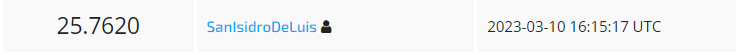

Fui mejornado los resultados al probar con diferentes escalados de datos. El mejor de todos ello fue el MaxAbsScaler.